In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import MinMaxScaler
from addnet import SubNet

 --- SUBNET --- 
subnet.bin_thresholds=[[0.0, 0.2, 0.4, 0.6, 0.8], [0.2, 0.4, 0.6, 0.8, 1.0]]
subnet.bin_dim=11
subnet.is_increasing=[True, False]
subnet.get_bound_of_coef()=[(None, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (None, None), (None, None)]
subnet.coef_=array([-9.86926509e-01,  1.34817637e-15,  1.47238644e+00,  1.63350956e-01,
        1.68194516e+00,  1.03003828e+00,  1.12133323e+00,  1.46010950e+00,
        3.69537091e-01, -1.00743190e+00, -1.19133632e+00])



Text(0.5, 1.0, 'boundary')

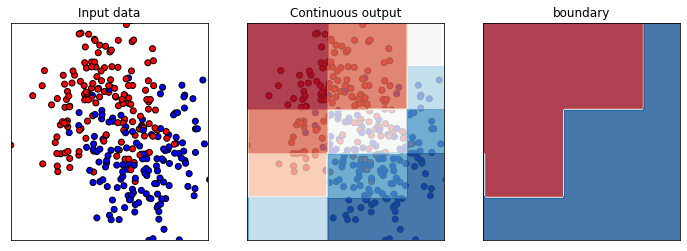

In [2]:
# constants
N_SAMPLES = 300
h = .01  # step size in the mesh
figure = plt.figure(figsize=(12, 4))
FEATURE_RANGE=(0, 1)
SEED = 314

# PLOT DATASET
x, y = make_moons(n_samples=N_SAMPLES, noise=0.4, random_state=SEED)
# x, y = make_blobs(n_samples=N_SAMPLES, centers=2, random_state=SEED)
x = MinMaxScaler(feature_range=FEATURE_RANGE).fit_transform(x)
x_train, y_train = x, y

# training
subnet = SubNet(binarize_type="auto")
subnet.fit(x_train, y_train)

print(" --- SUBNET --- ")
print(f"{subnet.bin_thresholds=}")
print(f"{subnet.bin_dim=}")
print(f"{subnet.is_increasing=}")
print(f"{subnet.get_bound_of_coef()=}")
print(f"{subnet.coef_=}")
print("")

x_min, x_max = FEATURE_RANGE
y_min, y_max = FEATURE_RANGE
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1, 3, 1)
# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Input data")


ax = plt.subplot(1, 3, 2)
# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
z = subnet.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
ax.set_title("Continuous output")


# PLOT BOUNDARY
ax = plt.subplot(1, 3, 3)
# Put the result into a color plot
z = subnet.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.contourf(xx, yy, z, cmap=cm, alpha=.8)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("boundary")

In [10]:
x_test = np.array([[0.15, 0.15], [0.3, 0.3], [0.7, 0.7]])
print(subnet.bin_thresholds)
print(subnet.is_increasing)
subnet.binarize(x_test)

[[0.2, 0.4, 0.6, 0.8], [0.2, 0.4, 0.6, 0.8]]
[True, False]


array([[0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 1., 1.]])